In [718]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

In [719]:
df = pd.read_csv('social_media_viral_content_dataset.csv')

In [720]:
df.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1


In [721]:
df.tail()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
1995,SM_101995,YouTube Shorts,text,Sports,es,US,2024-02-11 00:00:00,#funny #music #ai,14112183,486627,9430,91550,0.0416,-0.541,1
1996,SM_101996,Instagram,text,Politics,en,Brazil,2024-02-12 00:00:00,#viral #trending,5604744,467062,2764,16092,0.0867,0.287,1
1997,SM_101997,X,carousel,Education,ur,UK,2024-05-01 00:00:00,#trending #fyp,2031920,253990,40963,95697,0.1923,0.604,1
1998,SM_101998,X,carousel,Sports,ur,UK,2024-12-23 00:00:00,#funny #trending #tech,5237350,209494,15042,67422,0.0557,-0.861,1
1999,SM_101999,X,carousel,Politics,ur,Pakistan,2024-11-04 00:00:00,#viral #funny,3369429,481347,13455,9492,0.1497,0.297,1


In [722]:
df.shape

(2000, 15)

In [723]:
df.columns

Index(['post_id', 'platform', 'content_type', 'topic', 'language', 'region',
       'post_datetime', 'hashtags', 'views', 'likes', 'comments', 'shares',
       'engagement_rate', 'sentiment_score', 'is_viral'],
      dtype='object')

In [724]:
df.isnull().sum()

post_id            0
platform           0
content_type       0
topic              0
language           0
region             0
post_datetime      0
hashtags           0
views              0
likes              0
comments           0
shares             0
engagement_rate    0
sentiment_score    0
is_viral           0
dtype: int64

In [725]:
df.isnull().sum().sum()

0

In [726]:
df.duplicated().sum()

0

In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          2000 non-null   object 
 1   platform         2000 non-null   object 
 2   content_type     2000 non-null   object 
 3   topic            2000 non-null   object 
 4   language         2000 non-null   object 
 5   region           2000 non-null   object 
 6   post_datetime    2000 non-null   object 
 7   hashtags         2000 non-null   object 
 8   views            2000 non-null   int64  
 9   likes            2000 non-null   int64  
 10  comments         2000 non-null   int64  
 11  shares           2000 non-null   int64  
 12  engagement_rate  2000 non-null   float64
 13  sentiment_score  2000 non-null   float64
 14  is_viral         2000 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 234.5+ KB


In [728]:
df.describe()

,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.284860e+06,245329.244000,24786.929000,49936.981500,0.157852,-0.000566,0.699000
std,3.246193e+06,145032.423582,14433.288364,29012.818697,0.535457,0.574911,0.458807
min,4.380000e+03,292.000000,14.000000,127.000000,0.035700,-1.000000,0.000000
25%,1.652742e+06,118903.750000,12337.750000,25698.750000,0.057975,-0.507000,0.000000
50%,3.469408e+06,239831.000000,24519.500000,50212.000000,0.084500,0.001000,1.000000
75%,6.348078e+06,372323.500000,37116.250000,75433.000000,0.142525,0.495250,1.000000
max,1.437179e+07,499983.000000,49989.000000,99977.000000,12.573200,0.999000,1.000000


In [729]:
df.describe(include='object')

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags
count,2000,2000,2000,2000,2000,2000,2000,2000
unique,2000,4,4,6,5,5,366,1229
top,SM_100000,Instagram,carousel,Education,en,US,2024-07-06 00:00:00,#viral #news
freq,1,539,528,347,420,428,15,16


In [730]:
df['post_datetime'] = pd.to_datetime(df['post_datetime'], errors='coerce')

In [731]:
df= df.drop('hashtags',axis=1)

In [732]:
df['post_hour'] = df['post_datetime'].dt.hour
df['post_day'] = df['post_datetime'].dt.day
df['post_month'] = df['post_datetime'].dt.month
df['post_weekday'] = df['post_datetime'].dt.weekday


In [733]:
df= df.drop('post_id',axis=1)
df= df.drop('post_datetime',axis=1)

In [734]:
df.columns

Index(['platform', 'content_type', 'topic', 'language', 'region', 'views',
       'likes', 'comments', 'shares', 'engagement_rate', 'sentiment_score',
       'is_viral', 'post_hour', 'post_day', 'post_month', 'post_weekday'],
      dtype='object')

In [735]:
num_features = df.select_dtypes(include=('float64','int64'))

In [736]:
num_features.columns

Index(['views', 'likes', 'comments', 'shares', 'engagement_rate',
       'sentiment_score', 'is_viral'],
      dtype='object')

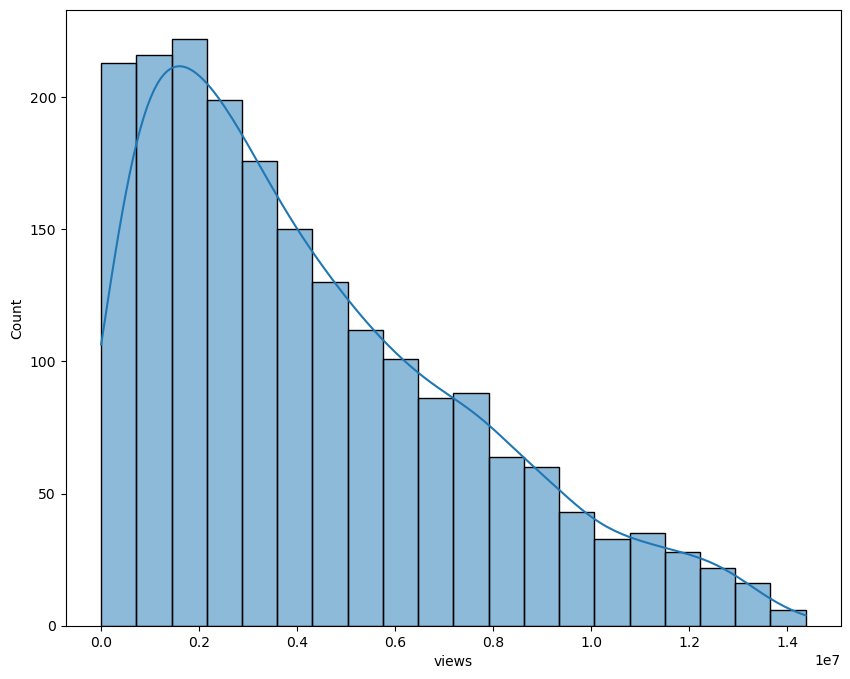

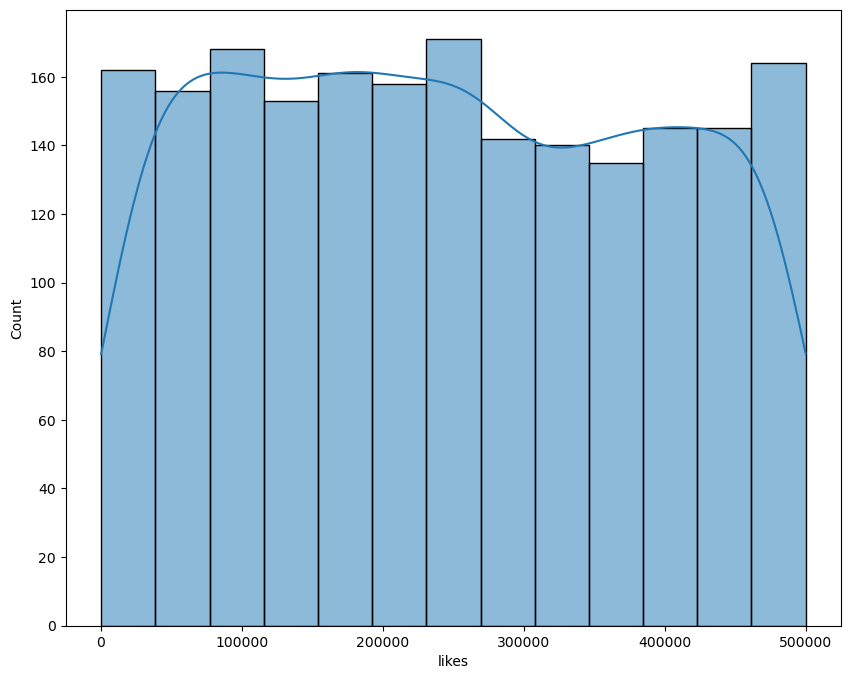

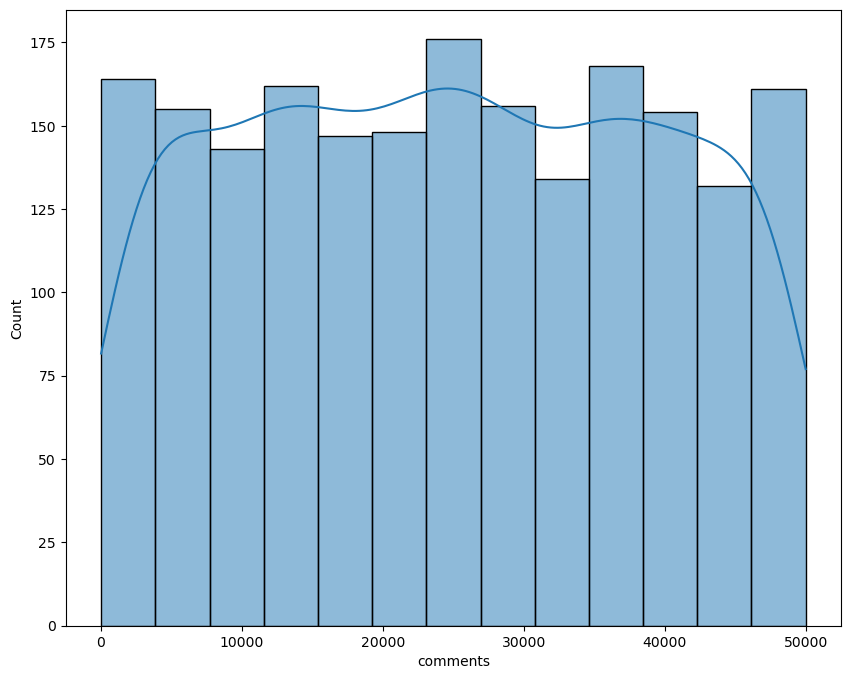

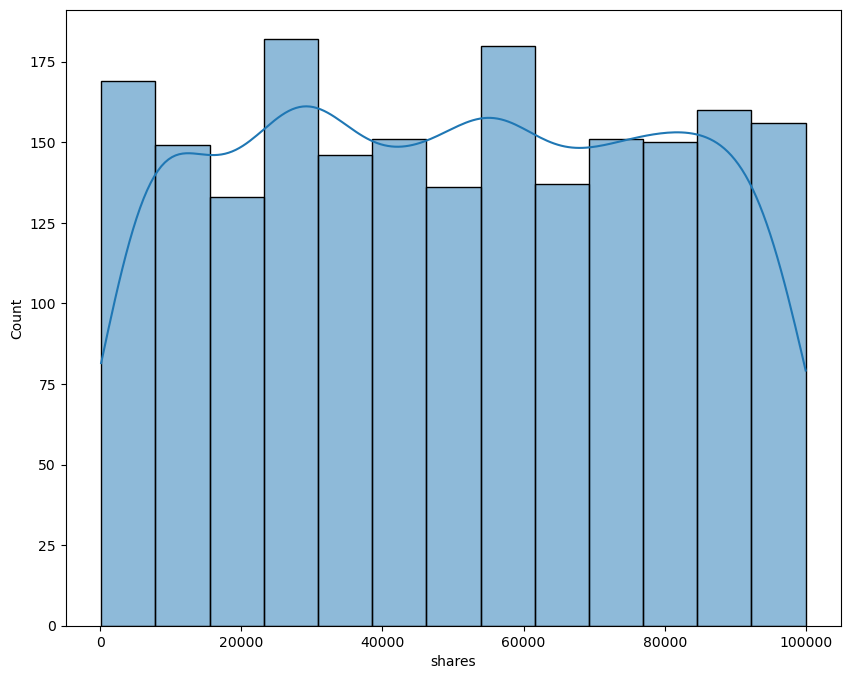

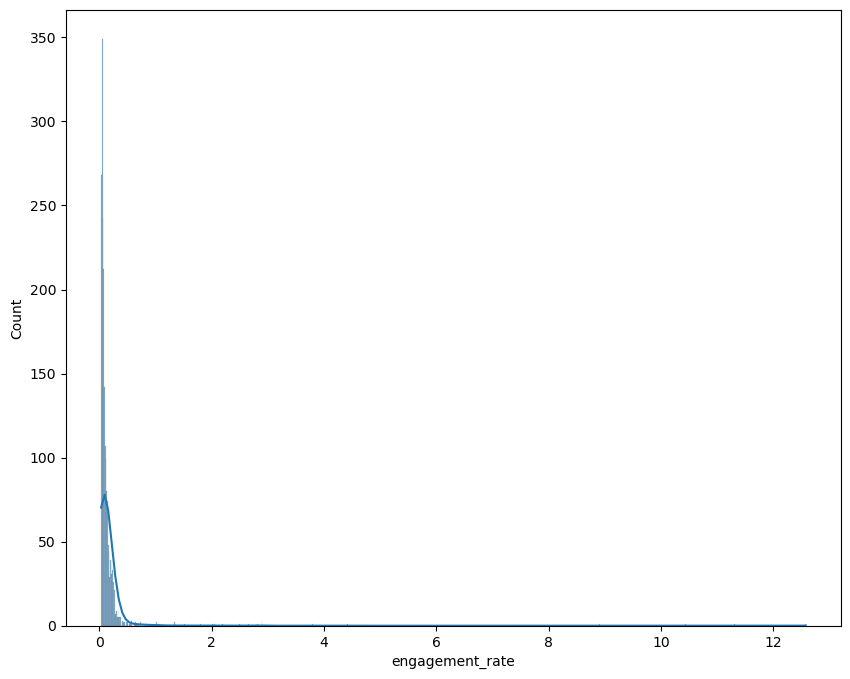

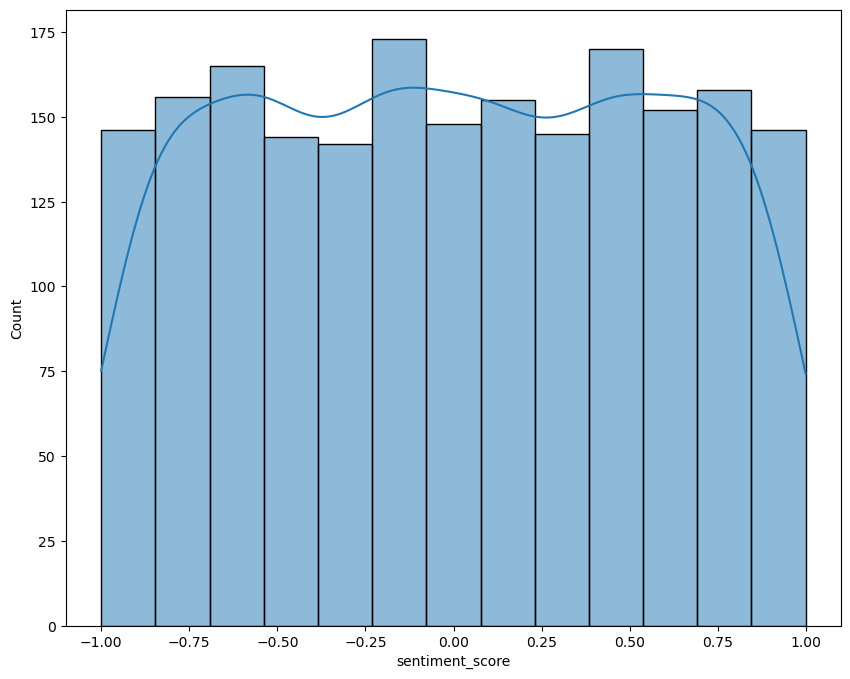

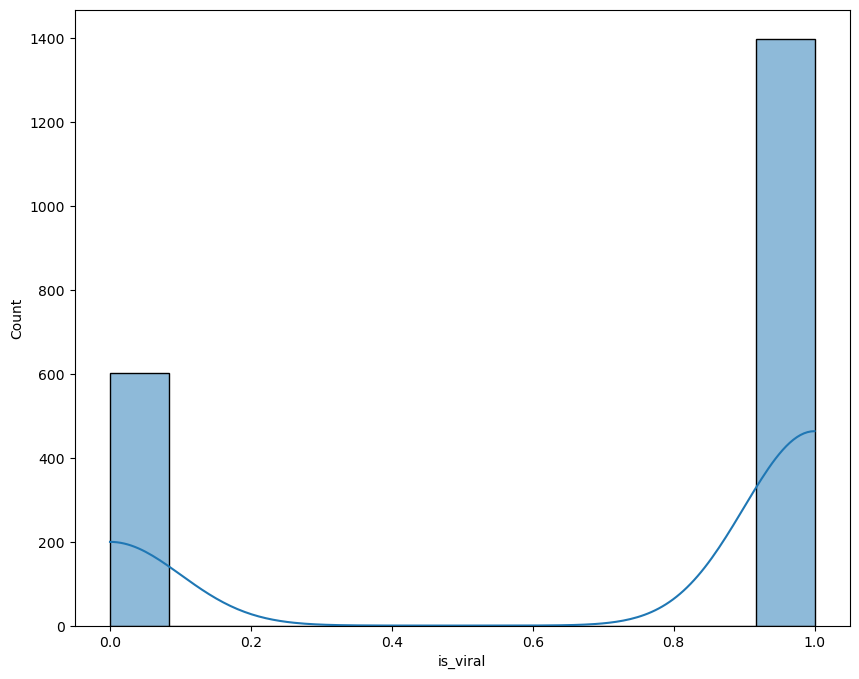

In [737]:
for i in num_features:
    plt.figure(figsize=(10,8))
    sns.histplot(df[i],kde=True)
    plt.show()

In [738]:
cat_cols = df.select_dtypes(include='object')

In [739]:
cat_cols.columns

Index(['platform', 'content_type', 'topic', 'language', 'region'], dtype='object')

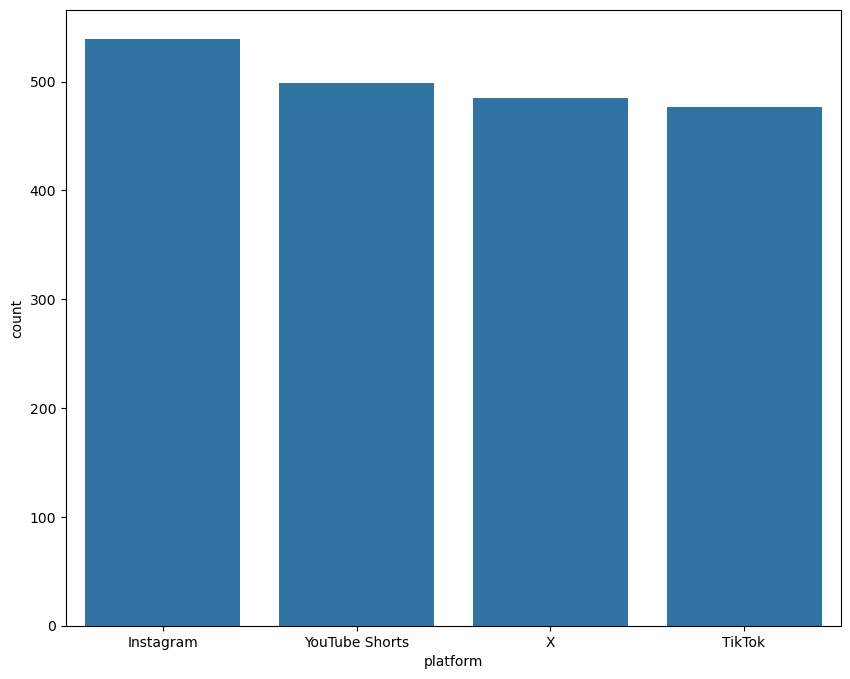

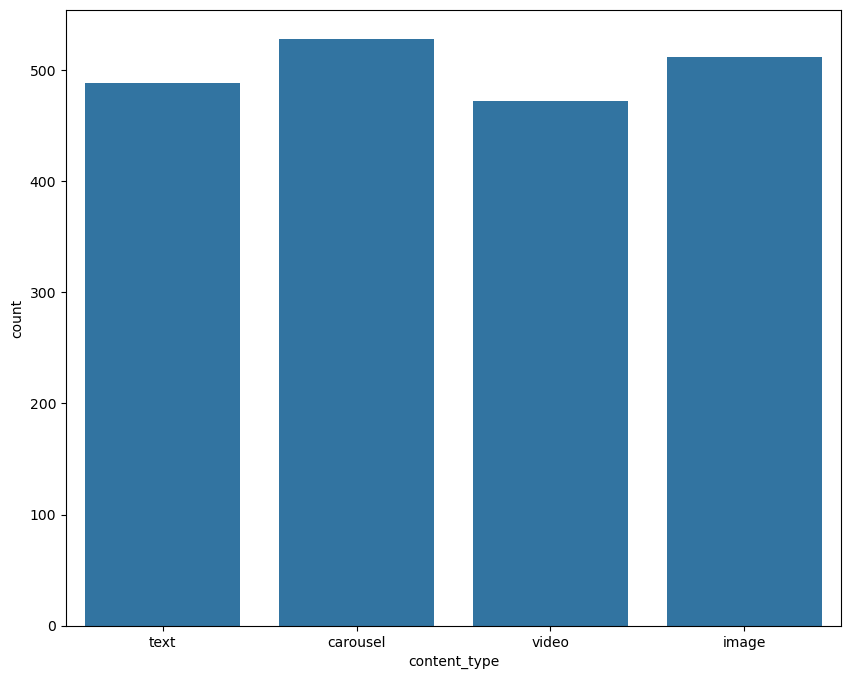

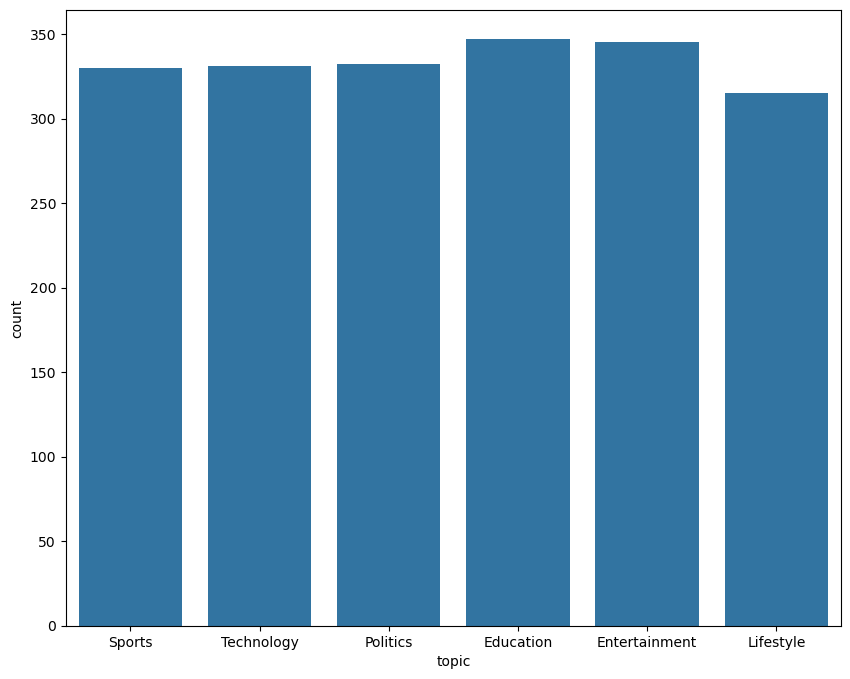

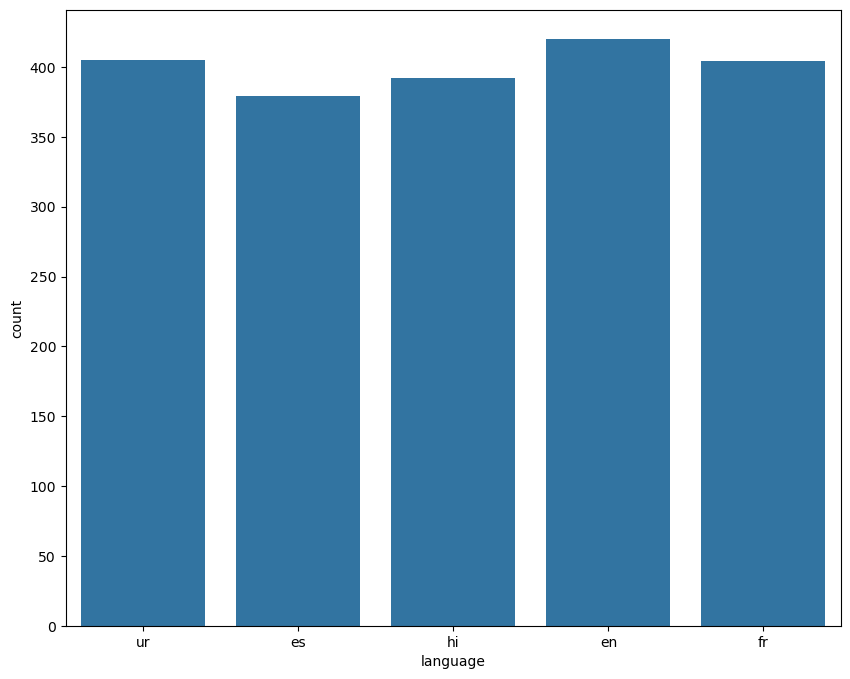

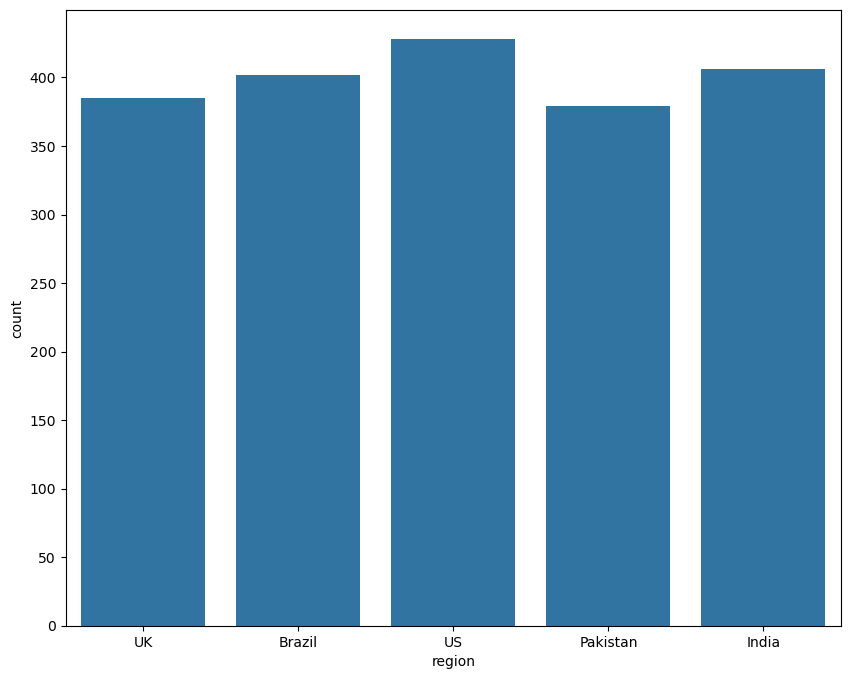

In [740]:
for i in cat_cols:
    plt.figure(figsize=(10,8))
    sns.countplot(x=df[i])
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

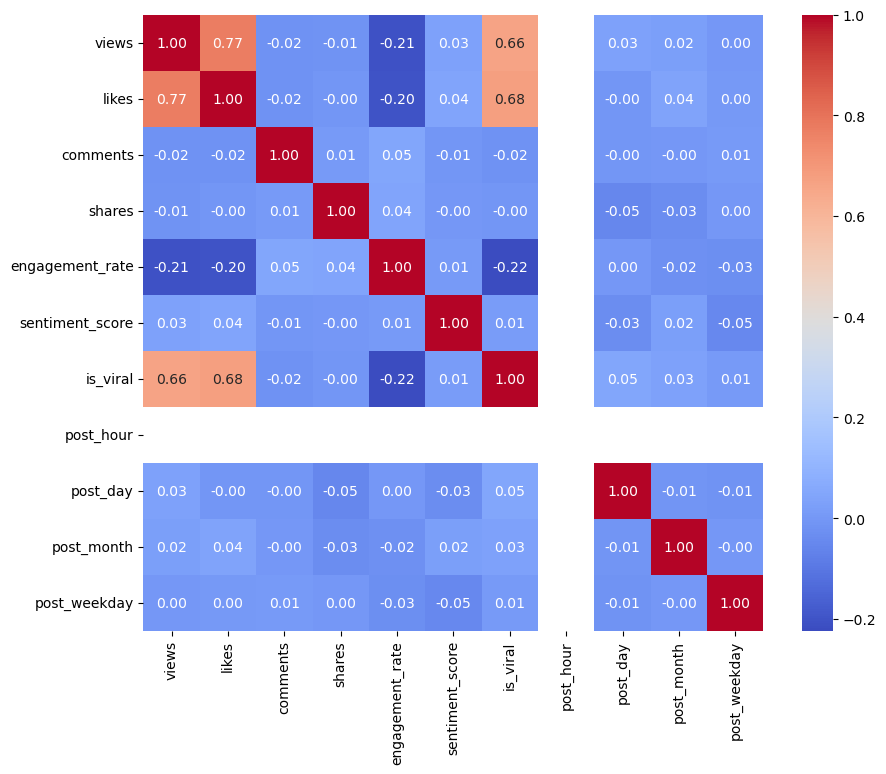

In [741]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap='coolwarm')
plt.show

In [742]:
df.groupby('platform')['is_viral'].mean().sort_values(ascending=False)

platform
Instagram         0.708720
TikTok            0.702306
X                 0.696907
YouTube Shorts    0.687375
Name: is_viral, dtype: float64

In [743]:
df['topic'].value_counts()

topic
Education        347
Entertainment    345
Politics         332
Technology       331
Sports           330
Lifestyle        315
Name: count, dtype: int64

<Axes: xlabel='topic'>

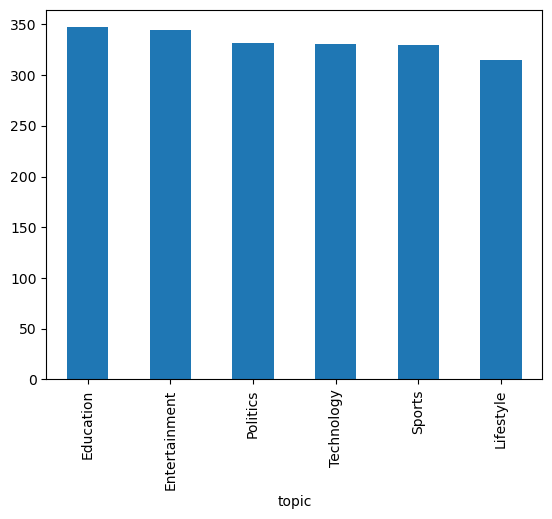

In [744]:
df['topic'].value_counts().plot(kind='bar')

In [745]:
df['language'].value_counts()

language
en    420
ur    405
fr    404
hi    392
es    379
Name: count, dtype: int64

<Axes: xlabel='language'>

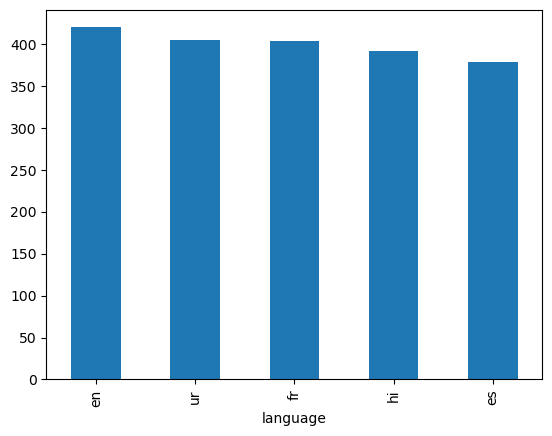

In [746]:
df['language'].value_counts().plot(kind='bar')

In [747]:
df['platform'].value_counts()

platform
Instagram         539
YouTube Shorts    499
X                 485
TikTok            477
Name: count, dtype: int64

<Axes: xlabel='platform'>

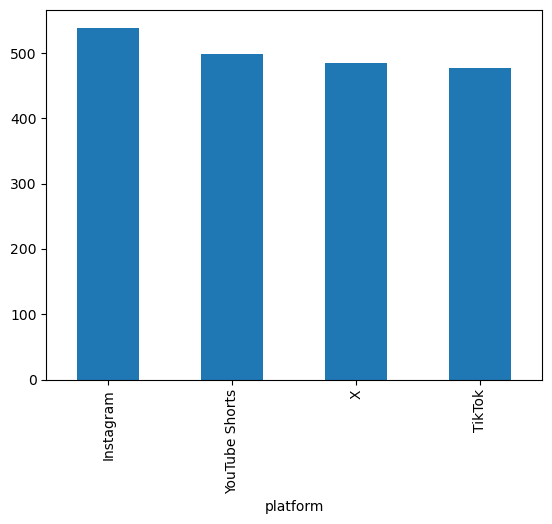

In [748]:
df['platform'].value_counts().plot(kind='bar')

In [749]:
df['content_type'].value_counts()

content_type
carousel    528
image       512
text        488
video       472
Name: count, dtype: int64

<Axes: xlabel='content_type'>

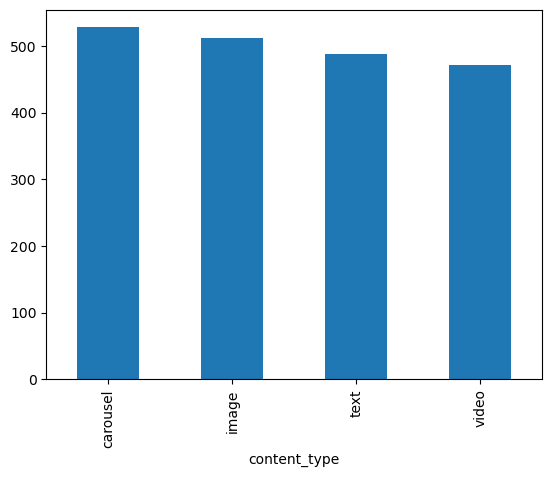

In [750]:
df['content_type'].value_counts().plot(kind='bar')

In [751]:
df['region'].value_counts()

region
US          428
India       406
Brazil      402
UK          385
Pakistan    379
Name: count, dtype: int64

<Axes: xlabel='region'>

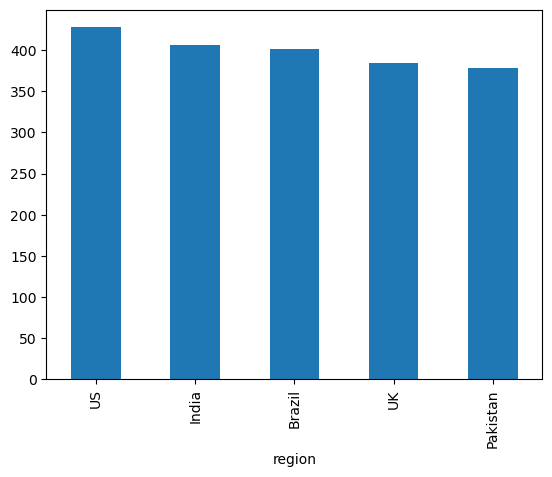

In [752]:
df['region'].value_counts().plot(kind='bar')

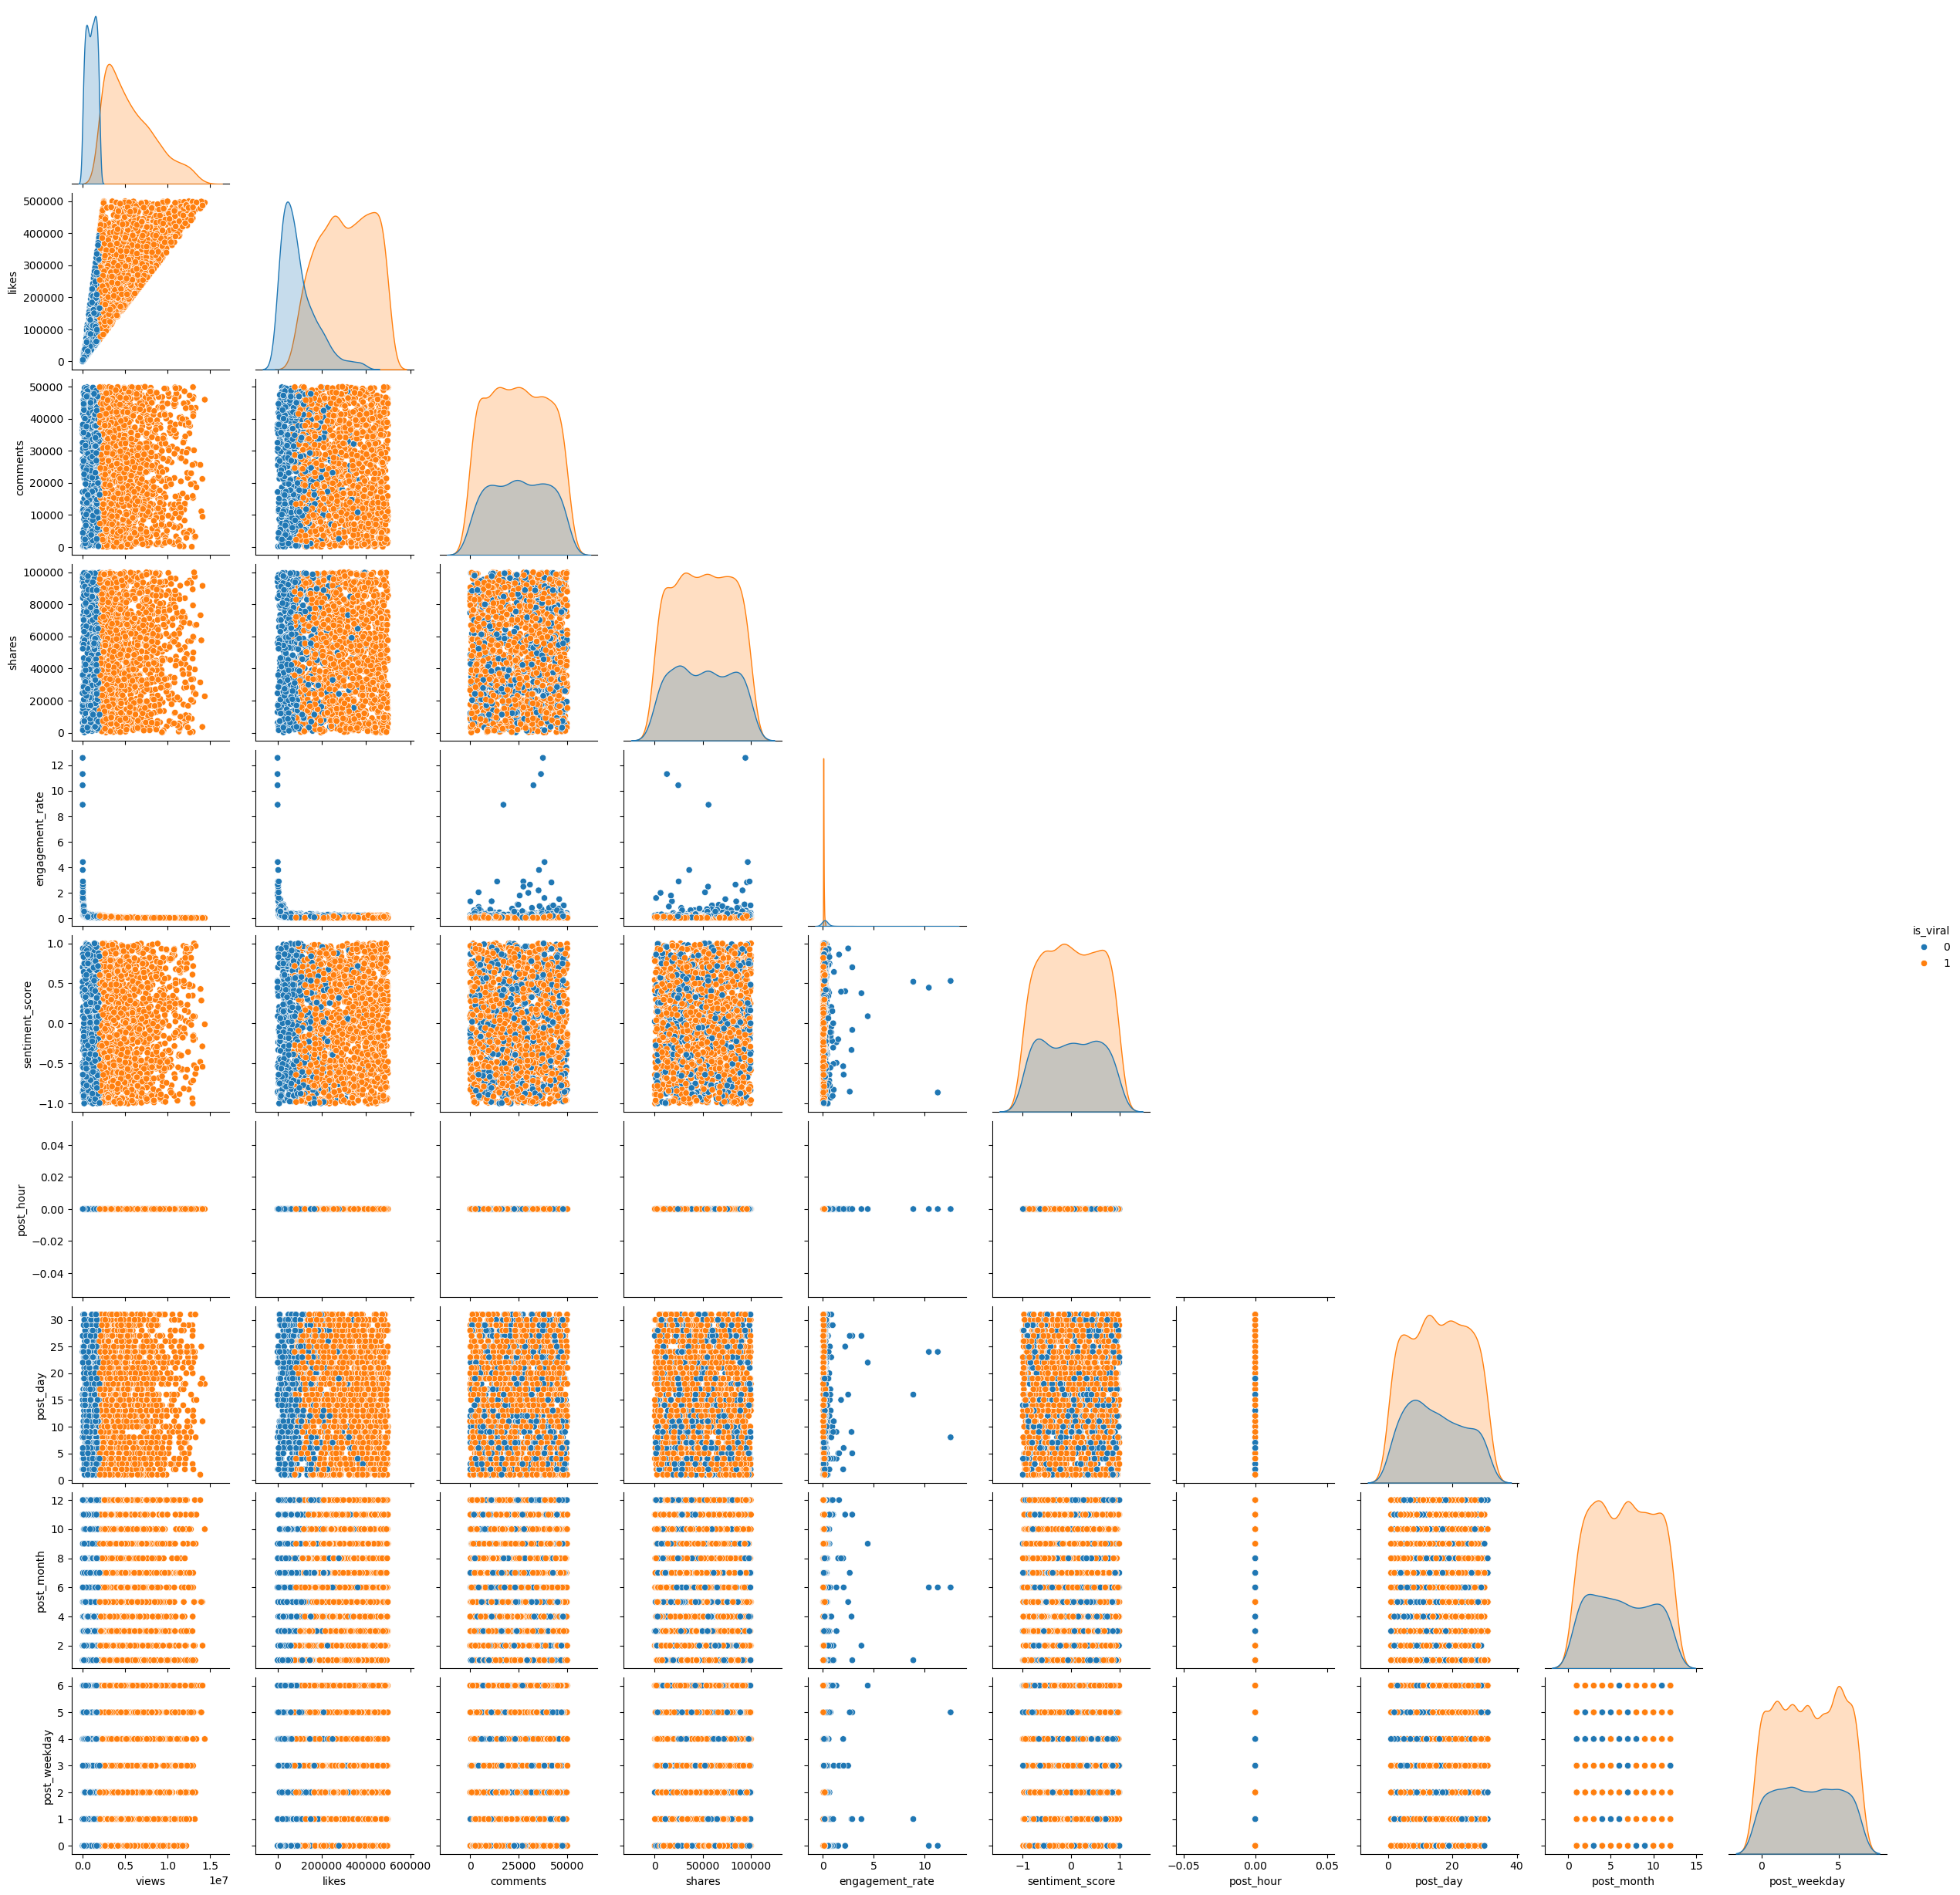

In [753]:
important_features = df.columns
sns.pairplot(
    df[important_features],
    hue="is_viral",
    diag_kind="kde",
    corner=True
)
plt.show()

In [754]:
df.columns

Index(['platform', 'content_type', 'topic', 'language', 'region', 'views',
       'likes', 'comments', 'shares', 'engagement_rate', 'sentiment_score',
       'is_viral', 'post_hour', 'post_day', 'post_month', 'post_weekday'],
      dtype='object')

In [755]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         2000 non-null   object 
 1   content_type     2000 non-null   object 
 2   topic            2000 non-null   object 
 3   language         2000 non-null   object 
 4   region           2000 non-null   object 
 5   views            2000 non-null   int64  
 6   likes            2000 non-null   int64  
 7   comments         2000 non-null   int64  
 8   shares           2000 non-null   int64  
 9   engagement_rate  2000 non-null   float64
 10  sentiment_score  2000 non-null   float64
 11  is_viral         2000 non-null   int64  
 12  post_hour        2000 non-null   int32  
 13  post_day         2000 non-null   int32  
 14  post_month       2000 non-null   int32  
 15  post_weekday     2000 non-null   int32  
dtypes: float64(2), int32(4), int64(5), object(5)
memory usage: 2

In [756]:
X = df.drop('is_viral',axis=1)
y = df['is_viral']

In [757]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [758]:
leakage_cols = [
    'views',
    'likes',
    'comments',
    'shares',
    'engagement_rate'
]

X_train = X_train.drop(columns=leakage_cols)
X_test  = X_test.drop(columns=leakage_cols)


In [759]:
X_train.columns

Index(['platform', 'content_type', 'topic', 'language', 'region',
       'sentiment_score', 'post_hour', 'post_day', 'post_month',
       'post_weekday'],
      dtype='object')

In [760]:
num_features = ['sentiment_score', 'post_day', 'post_month', 'post_weekday']

In [761]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            'num',
            StandardScaler(),
            make_column_selector(dtype_include='number')
        ),
        (
            'cat',
            OneHotEncoder(handle_unknown='ignore'),
            make_column_selector(dtype_include='object')
        )
    ],
    remainder='drop'  
)


In [762]:
models = {
    'LogisticRegression': (
        LogisticRegression(max_iter=2000),
        {"classifier__C":[0.01,0.1,1,10]}
    ),

    'DecisionTreeClassifier': (
        DecisionTreeClassifier(random_state=42),
        {"classifier__max_depth":[None,5,10,15,20]}
    ),

    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": [None, 10, 20]
        }
    ),

    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {
            "classifier__n_estimators": [100, 200],
            "classifier__learning_rate": [0.05, 0.1]
        }
    ),

    "SVM": (
        SVC(probability=True),
        {
            "classifier__C": [0.1, 1, 10],
            "classifier__kernel": ["linear", "rbf"]
        }
    ),

    "KNN": (
        KNeighborsClassifier(),
        {"classifier__n_neighbors": [3, 5, 7]}
    )
}


In [763]:
results = []

for name, (model, params) in models.items():

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=params,
        cv=5,
        scoring="f1_weighted",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    positive_class = 1
    pos_index = list(best_model.classes_).index(positive_class)
    y_prob = best_model.predict_proba(X_test)[:, pos_index]

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label=positive_class),
        "Recall": recall_score(y_test, y_pred, pos_label=positive_class),
        "F1-score": f1_score(y_test, y_pred, pos_label=positive_class),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })


In [764]:
results_df = (
    pd.DataFrame(results)
    .sort_values(by="F1-score", ascending=False)
    .reset_index(drop=True)
)

results_df


,Model,Best Params,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,LogisticRegression,{'classifier__C': 1},0.6975,0.699248,0.996429,0.821797,0.465655
1,Random Forest,"{'classifier__max_depth': 20, 'classifier__n_e...",0.6850,0.700521,0.960714,0.810241,0.482113
2,Gradient Boosting,"{'classifier__learning_rate': 0.1, 'classifier...",0.6825,0.702918,0.946429,0.806697,0.488690
3,KNN,{'classifier__n_neighbors': 7},0.6350,0.692529,0.860714,0.767516,0.446875
4,SVM,"{'classifier__C': 10, 'classifier__kernel': 'r...",0.5925,0.682243,0.782143,0.728785,0.486786
5,DecisionTreeClassifier,{'classifier__max_depth': 15},0.5400,0.672662,0.667857,0.670251,0.452024
